In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm, tree, datasets, metrics
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load data

In [2]:
data = datasets.load_wine()
shapedData = data.data
X_train, X_test, y_train, y_test = train_test_split(shapedData, data.target, test_size = 0.5)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree

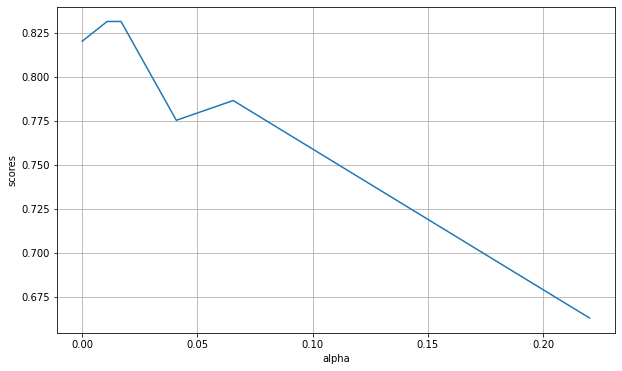

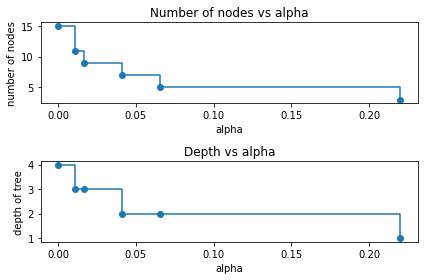

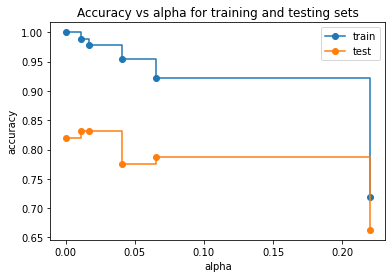

1 0.010834670947030497 0.8314606741573034
--- 0.7225143909454346 seconds ---


In [21]:
start_time = time.time()
tr = tree.DecisionTreeClassifier()
path = tr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(ccp_alphas, acc_scores)
plt.xlabel("alpha")
plt.ylabel("scores")
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
index_best = np.argmax(test_scores)
print (index_best, ccp_alphas[index_best], test_scores[index_best])
print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
start_time = time.time()
dt = tree.DecisionTreeClassifier(ccp_alpha = ccp_alphas[index_best])
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
print (classification_report(y_test, dt_predicted))
dt_accuracy = accuracy_score(y_test, dt_predicted)
print (dt_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.88      0.95      0.91        39
           2       1.00      0.89      0.94        27

    accuracy                           0.92        89
   macro avg       0.93      0.92      0.92        89
weighted avg       0.93      0.92      0.92        89

0.9213483146067416
--- 0.009045600891113281 seconds ---


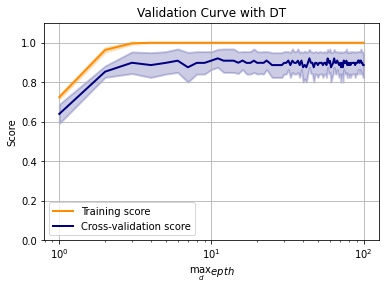

--- 1.3527462482452393 seconds ---


In [5]:
start_time = time.time()
param_range = np.arange(100) + 1
train_scores, test_scores = validation_curve(
    dt, X_train, y_train, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.title("Validation Curve with DT")
plt.xlabel(r"$\max_depth$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

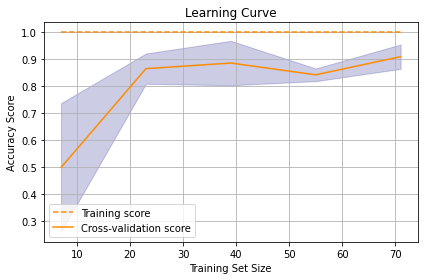

--- 0.3011057376861572 seconds ---


In [6]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.grid()
plt.plot(train_sizes, train_mean, '--', color="darkorange",  label="Training score")
plt.plot(train_sizes, test_mean, color="darkorange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="navy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

# Neural network

In [7]:
start_time = time.time()
nn = MLPClassifier(hidden_layer_sizes=(13, 13, 13), random_state=10, max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.92      0.96        39
           2       1.00      1.00      1.00        27

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89

0.9662921348314607
--- 0.22777318954467773 seconds ---


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


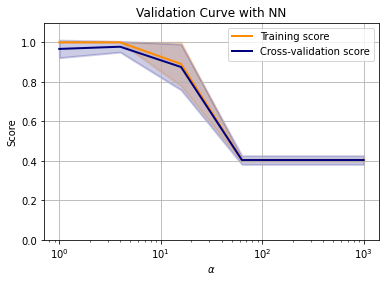

--- 11.279096126556396 seconds ---


In [8]:
start_time = time.time()
param_range = np.logspace(0, 3, 6)
train_scores, test_scores = validation_curve(
    nn, X_train, y_train, param_name="alpha", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.title("Validation Curve with NN")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

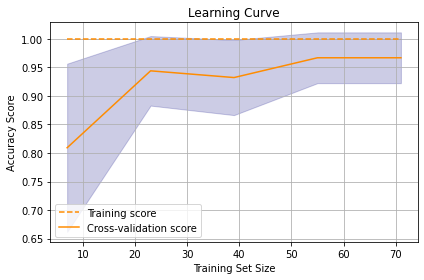

--- 4.369964838027954 seconds ---


In [9]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(nn, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.grid()
plt.plot(train_sizes, train_mean, '--', color="darkorange",  label="Training score")
plt.plot(train_sizes, test_mean, color="darkorange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="navy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

# Boosting

In [10]:
start_time = time.time()
abd = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators = 20, learning_rate = 1)
abd.fit(X_train, y_train)
abd_predicted = abd.predict(X_test)
abd_accuracy = accuracy_score(y_test, abd_predicted)
print (classification_report(y_test, abd_predicted))
print (abd_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.90      0.95      0.92        39
           2       1.00      0.89      0.94        27

    accuracy                           0.92        89
   macro avg       0.93      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89

0.9213483146067416
--- 0.008891582489013672 seconds ---


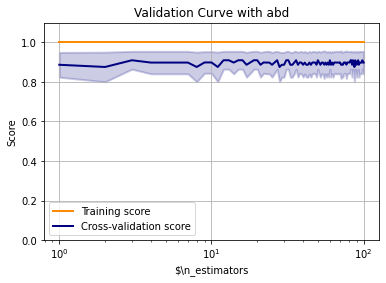

--- 2.136204481124878 seconds ---


In [11]:
start_time = time.time()
param_range = np.arange(100) + 1
train_scores, test_scores = validation_curve(
    abd, X_train, y_train, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.title("Validation Curve with abd")
plt.xlabel(r"$\n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

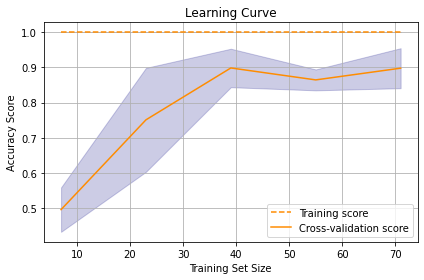

--- 0.3279716968536377 seconds ---


In [12]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(abd, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.grid()
plt.plot(train_sizes, train_mean, '--', color="darkorange",  label="Training score")
plt.plot(train_sizes, test_mean, color="darkorange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="navy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

# SVM

In [13]:
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predicted)
print (classification_report(y_test, svm_predicted))
print (svm_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        27

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

1.0
--- 0.010018348693847656 seconds ---


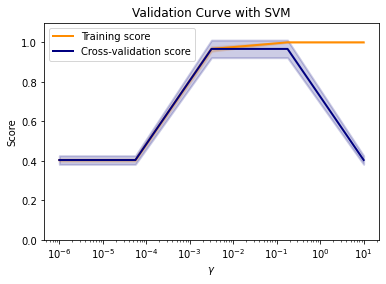

--- 0.6385626792907715 seconds ---


In [14]:
start_time = time.time()
param_range = np.logspace(-6, 1, 5)
train_scores, test_scores = validation_curve(
    svm, X_train, y_train, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

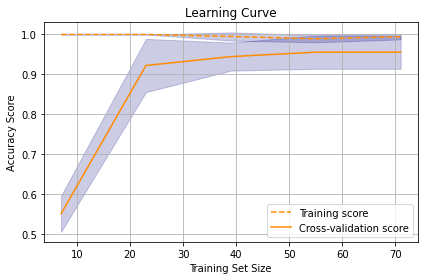

--- 0.2729346752166748 seconds ---


In [15]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.grid()
plt.plot(train_sizes, train_mean, '--', color="darkorange",  label="Training score")
plt.plot(train_sizes, test_mean, color="darkorange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="navy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

# kNN

In [16]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predicted)
print (classification_report(y_test, knn_predicted))
print (knn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      0.82      0.90        39
           2       1.00      1.00      1.00        27

    accuracy                           0.92        89
   macro avg       0.92      0.94      0.92        89
weighted avg       0.94      0.92      0.92        89

0.9213483146067416
--- 0.016322851181030273 seconds ---


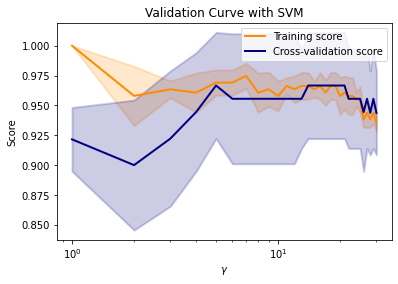

--- 1.2184576988220215 seconds ---


In [17]:
start_time = time.time()
param_range = np.arange(30) + 1
train_scores, test_scores = validation_curve(
    knn, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

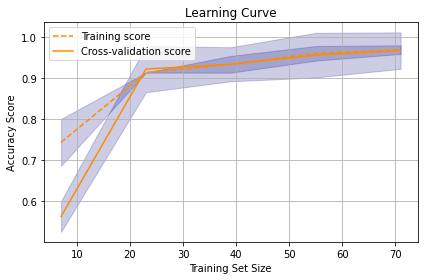

--- 0.37522125244140625 seconds ---


In [18]:
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.grid()
plt.plot(train_sizes, train_mean, '--', color="darkorange",  label="Training score")
plt.plot(train_sizes, test_mean, color="darkorange", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="navy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

# Grid search

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(50)+1, 'min_samples_split': np.arange(10)+2, 'min_samples_leaf': np.arange(10)+1, 'max_features': np.arange(10)+1}
dt = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
dt.fit(X_train, y_train)
print("Best DT score:{:.2f}".format(dt.best_score_))
print("Best DT parameters:{}".format(dt.best_params_))

Best DT score:0.98
Best DT parameters:{'max_depth': 26, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [61]:
dt_predicted = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predicted)
print (classification_report(y_test, dt_predicted))
print (dt_accuracy)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       0.88      0.90      0.89        39
           2       0.89      0.59      0.71        27

    accuracy                           0.83        89
   macro avg       0.84      0.83      0.82        89
weighted avg       0.84      0.83      0.82        89

0.8314606741573034


In [70]:
parameters = {'learning_rate_init': np.logspace(-2,1,8), 'alpha': np.logspace(-6, -2, 8), 'hidden_layer_sizes':np.arange(1, 13)}
nn = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
nn.fit(X_train, y_train)
print("Best NN score:{:.2f}".format(nn.best_score_))
print("Best NN parameters:{}".format(nn.best_params_))

Best NN score:0.98
Best NN parameters:{'alpha': 1e-06, 'hidden_layer_sizes': 11, 'learning_rate_init': 0.07196856730011521}


In [71]:
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       1.00      0.90      0.95        39
           2       1.00      1.00      1.00        27

    accuracy                           0.96        89
   macro avg       0.95      0.97      0.96        89
weighted avg       0.96      0.96      0.96        89

0.9550561797752809


In [73]:
parameters = {'n_estimators': np.arange(30)+1, 'learning_rate': np.arange(0.1, 2, 0.1)}
adb = GridSearchCV(AdaBoostClassifier(), parameters)
adb.fit(X_train, y_train)
print("Best Boosting score:{:.2f}".format(adb.best_score_))
print("Best Boosting parameters:{}".format(adb.best_params_))

Best Boosting score:0.98
Best Boosting parameters:{'learning_rate': 0.5, 'n_estimators': 13}


In [74]:
adb_predicted = adb.predict(X_test)
adb_accuracy = accuracy_score(y_test, adb_predicted)
print (classification_report(y_test, adb_predicted))
print (adb_accuracy)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.84      0.95      0.89        39
           2       1.00      0.81      0.90        27

    accuracy                           0.90        89
   macro avg       0.92      0.89      0.90        89
weighted avg       0.91      0.90      0.90        89

0.898876404494382


In [40]:
parameters = {'gamma': np.logspace(-6, 6, 26), 'C': np.logspace(-6, 6, 26)}
svm = GridSearchCV(SVC(), parameters)
svm.fit(X_train, y_train)
print("Best SVM score:{:.2f}".format(svm.best_score_))
print("Best SVM parameters:{}".format(svm.best_params_))

Best SVM score:0.98
Best SVM parameters:{'C': 0.5754399373371566, 'gamma': 0.02089296130854041}


In [66]:
svm_predicted = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predicted)
print (classification_report(y_test, svm_predicted))
print (svm_accuracy)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        39
           2       1.00      1.00      1.00        27

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89

0.9887640449438202


In [32]:
parameters = {'n_neighbors': np.arange(30)+1, 'leaf_size': np.arange(50)+1, 'p': [1, 2]}
knn = GridSearchCV(KNeighborsClassifier(), parameters)
knn.fit(X_train, y_train)
print("Best kNN score:{:.2f}".format(knn.best_score_))
print("Best kNN parameters:{}".format(knn.best_params_))

Best kNN score:0.98
Best kNN parameters:{'leaf_size': 1, 'n_neighbors': 9, 'p': 1}


In [68]:
knn_predicted = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predicted)
print (classification_report(y_test, knn_predicted))
print (knn_accuracy)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.85      0.92        39
           2       1.00      1.00      1.00        27

    accuracy                           0.93        89
   macro avg       0.93      0.95      0.93        89
weighted avg       0.95      0.93      0.93        89

0.9325842696629213
